# The Underlying Principles of DNA Sequence Compression

The FASTQ format is a text-based format for storing both a biological sequence (usually nucleotide sequence) and its corresponding quality scores. Both the sequence letter and quality score are each encoded with a single ASCII character for brevity. 

## Reading and parsing a FASTQ file

In [21]:
def process(lines=None):
    keys = ['name', 'sequence', 'optional', 'quality']
    return {key: value for key, value in zip(keys, lines)}


file_name = 'example.fastq'
with open(file_name, 'r') as f:
    lines = []
    for line in f:
        lines.append(line.rstrip())
        if len(lines) == 4:
            record = process(lines)
            print("Record: {}".format(str(record)))
            lines = []

Record: {'name': '@SEQ_ID', 'sequence': 'GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT', 'optional': '+', 'quality': "!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65"}
Record: {'name': '@SEQ_ID', 'sequence': 'GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT', 'optional': '+', 'quality': "!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65"}
Record: {'name': '@SEQ_ID', 'sequence': 'GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT', 'optional': '+', 'quality': "!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65"}


## Compressing DNA Sequences

The entropy of the sequence is an estimate of its compressibility:

In [22]:
import entropy
import math

seq = record['sequence'] * 10
seq_len = len(seq)
print('Sequence: {}'.format(seq))
print('Length: {}'.format(seq_len))

eta = entropy.calculate(seq)
print('Entropy: {0:.2f} bit/symbol'.format(round(eta, 2)))

min_size_in_bit = math.ceil(eta * seq_len)
min_size_in_byte = math.ceil(min_size_in_bit / 8)
print('Maximum compressed size: {} bit'.format(min_size_in_bit))
print('Maximum compressed size: {} byte'.format(min_size_in_byte))

Sequence: GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
Length: 600
Entropy: 1.93 bit/symbol
Maximum compressed size: 1160 bit
Maximum compressed size: 145 byte


Using gzip:

In [23]:
import gzip

compressed_seq = gzip.compress(data=bytes(seq, 'utf-8'))
compressed_seq_len = len(compressed_seq)
print('Length: {}'.format(compressed_seq_len))
decompressed_seq = gzip.decompress(data=compressed_seq)
print(decompressed_seq.decode('utf-8'))
comp_factor = seq_len / compressed_seq_len
print('Compression factor: {:.2f}x'.format(comp_factor))

Length: 65
GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTGATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
Compression factor: 9.23x


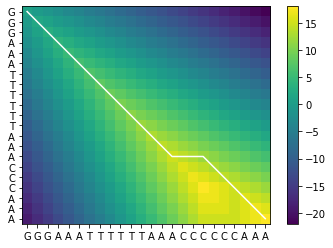

In [44]:
import alignment
import entropy

x = "GGGAAATTTTTTAAACCCAAA"
y = "GGGAAATTTTTTAAACCCCCCAAA"
x_aligned, y_aligned, path_x, path_y, F = alignment.nw(x=x, y=y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(F)
plt.xticks(ticks=range(len(y)), labels=y)
plt.yticks(ticks=range(len(x)), labels=x)
plt.colorbar()
plt.plot(path_y, path_x, 'w')
plt.show()

sw: multiple (2) possible traceback starts
sw: choosing [12  8]


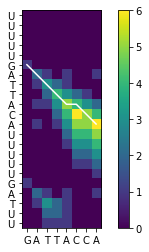

In [25]:
import alignment

x = "UUUUUGATTACAUUUUUGATUU"
y = "GATTACCA"
x_aligned, y_aligned, path_x, path_y, F = alignment.sw(x=x, y=y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(F)
plt.xticks(ticks=range(len(y)), labels=y)
plt.yticks(ticks=range(len(x)), labels=x)
plt.colorbar()
plt.plot(path_y, path_x, 'w')
plt.show()

In [26]:
import random

ref = 'GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA'
#ref= 'GATTACA'

reads = []
num_reads = 10
min_read_len = 5
max_read_len = 10
for i in range(num_reads):
    range_acquired = False
    start = 0
    end = 0
    while not range_acquired:
        start = random.randrange(len(ref))
        end = random.randrange(len(ref))
        if start > end:
            continue
        if (end - start+1) < min_read_len:
            continue
        if (end - start+1) > max_read_len:
            continue
        range_acquired = True
    print('Read {} range: [{:3d} {:3d}] (length: {})'.format(i, start, end, end-start+1))
    read = ref[start:end+1]
    print('Read: {}'.format(read))
    reads.append(read)
print(reads)
    

Read 0 range: [  5  14] (length: 10)
Read: GGGGTTCAAA
Read 1 range: [ 31  36] (length: 6)
Read: AGTAAA
Read 2 range: [ 20  24] (length: 5)
Read: ATCGA
Read 3 range: [  7  16] (length: 10)
Read: GGTTCAAAGC
Read 4 range: [ 50  59] (length: 10)
Read: CTCACAGTTT
Read 5 range: [  1   5] (length: 5)
Read: ATTTG
Read 6 range: [ 22  27] (length: 6)
Read: CGATCA
Read 7 range: [ 40  48] (length: 9)
Read: ATTTGTTCA
Read 8 range: [ 51  58] (length: 8)
Read: TCACAGTT
Read 9 range: [ 28  34] (length: 7)
Read: AATAGTA
['GGGGTTCAAA', 'AGTAAA', 'ATCGA', 'GGTTCAAAGC', 'CTCACAGTTT', 'ATTTG', 'CGATCA', 'ATTTGTTCA', 'TCACAGTT', 'AATAGTA']


GGGGTTCAAA
TGGTTTTAAC


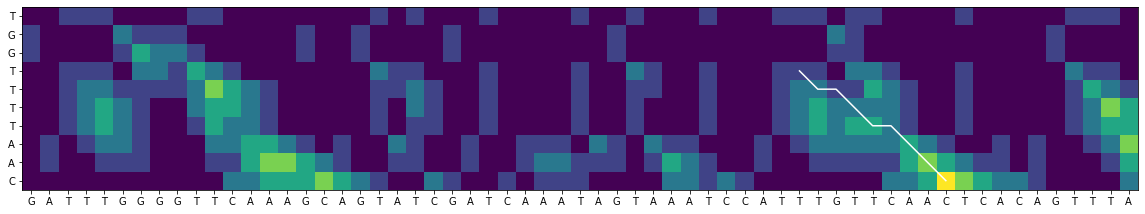

[42, 43, 44, 45, 46, 47, 48, 49, 50]
42
TT-TT-AAC
TTGTTCAAC
0
9
1
9
2
9
3
9
4
9
5
9
6
9
7
9
8
9
mm-mm-mmm
---
AGTAAA
ACTAGA
sw: multiple (6) possible traceback starts
sw: choosing [ 4 54]


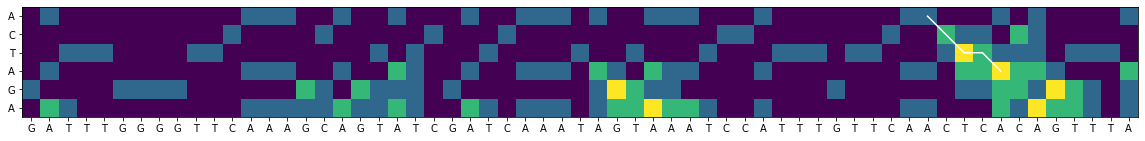

[49, 50, 51, 52, 53]
49
ACT-A
ACTCA
0
5
1
5
2
5
3
5
4
5
mmm-m
---
ATCGA
GTATC


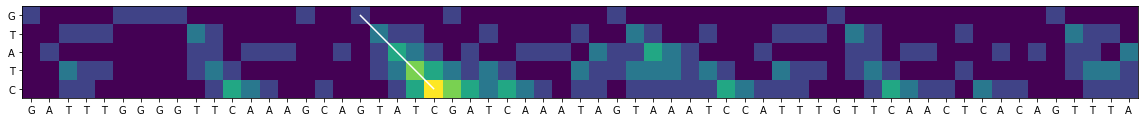

[18, 19, 20, 21, 22]
18
GTATC
GTATC
0
5
1
5
2
5
3
5
4
5
mmmmm
---
GGTTCAAAGC
GGCTCTTAGC


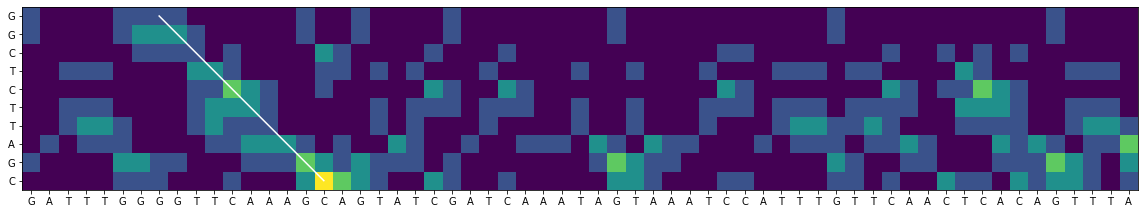

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
7
GGCTCTTAGC
GGTTCAAAGC
0
10
1
10
2
10
3
10
4
10
5
10
6
10
7
10
8
10
9
10
mmCmmTTmmm
---
CTCACAGTTT
TACACAGTTG


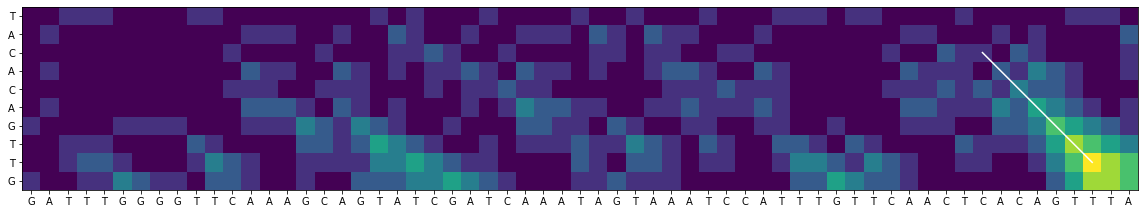

[52, 53, 54, 55, 56, 57, 58]
52
CACAGTT
CACAGTT
0
7
1
7
2
7
3
7
4
7
5
7
6
7
mmmmmmm
---
ATTTG
TTTTG
sw: multiple (2) possible traceback starts
sw: choosing [5 6]


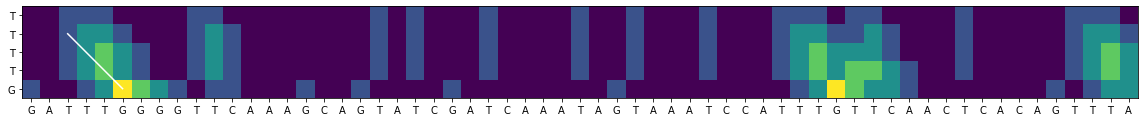

[2, 3, 4, 5]
2
TTTG
TTTG
0
4
1
4
2
4
3
4
mmmm
---
CGATCA
AAAAGT


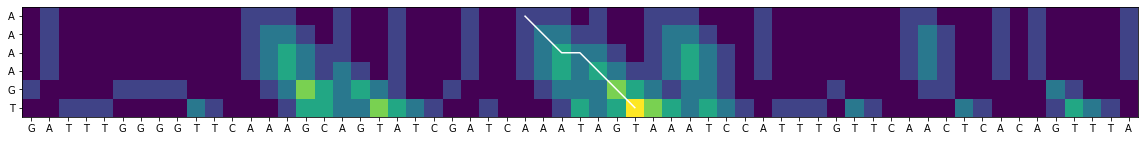

[27, 28, 29, 30, 31, 32, 33]
27
AAA-AGT
AAATAGT
0
7
1
7
2
7
3
7
4
7
5
7
6
7
mmm-mmm
---
ATTTGTTCA
TGTTGTTGC
sw: multiple (2) possible traceback starts
sw: choosing [ 9 48]


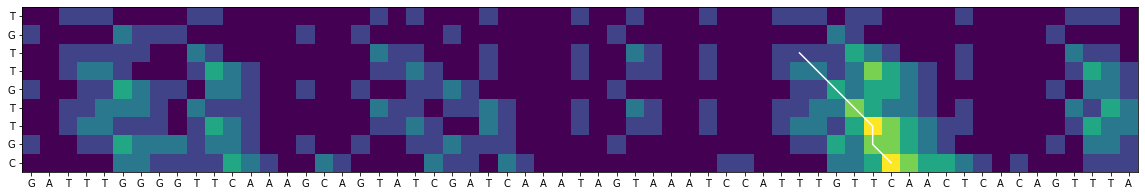

[42, 43, 44, 45, 46, 46, 47]
42
TTGTTGC
TTGTTC
0
6
1
6
2
6
3
6
4
6
5
6
6
6
mmmmmGC
---
TCACAGTT
CCAATCAT
sw: multiple (2) possible traceback starts
sw: choosing [ 8 42]


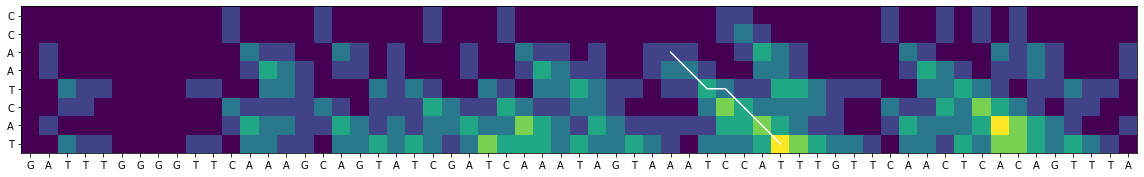

[35, 36, 37, 38, 39, 40, 41]
35
AAT-CAT
AATCCAT
0
7
1
7
2
7
3
7
4
7
5
7
6
7
mmm-mmm
---
AATAGTA
CATGGAC
sw: multiple (4) possible traceback starts
sw: choosing [ 3 42]


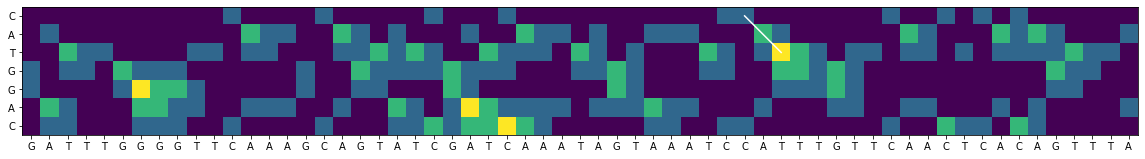

[39, 40, 41]
39
CAT
CAT
0
3
1
3
2
3
mmm
---


In [41]:
import alignment

#introduce some noise?
def add_noise(read):
    choices = ['A', 'C', 'G', 'T']
    noisy_read = ''
    for base in read:
        if random.randint(a=0, b=1) == 0:
            noisy_base = random.choice([c for c in choices if c != base])
            noisy_read += noisy_base
        else:
            noisy_read += base
    return noisy_read


diffs = []
for read in reads:
    print(read)
    read = add_noise(read)
    print(read)
    read_aligned, ref_aligned, path_x, path_y, F = alignment.sw(x=read, y=ref)
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=[20,10])
    plt.imshow(F)
    plt.xticks(ticks=range(len(ref)), labels=ref)
    plt.yticks(ticks=range(len(read)), labels=read)
    #plt.colorbar()
    plt.plot(path_y, path_x, 'w')
    plt.show()
    
    print(path_y)
    print(path_y[0]) # mapping position
    print(read_aligned)
    # get ref substring
    print(ref[path_y[0]:path_y[-1]+1])
    
    ref_substring = ref[path_y[0]:path_y[-1]+1]
    diff = ''
    for i in range(len(read_aligned)):
        print(i)
        print(len(ref_substring))
        if i >= len(ref_substring) or read_aligned[i] != ref_substring[i]:
            diff += read_aligned[i]
        else:
            diff += 'm'

    print(diff)
    diffs.append(diff)
    
    print('---')

In [28]:
print(reads)
print(diffs)

['GGGGTTCAAA', 'AGTAAA', 'ATCGA', 'GGTTCAAAGC', 'CTCACAGTTT', 'ATTTG', 'CGATCA', 'ATTTGTTCA', 'TCACAGTT', 'AATAGTA']
['mmAmGmmCA', 'mm-mmm-m', 'mm', 'mmGmmmmCT', 'mmmTmTmmmm', 'mmm', 'mmmmm', 'mmGmmmm', 'mmmmTA-mT', 'mmmm']


In [29]:
import entropy
eta = entropy.calculate(''.join(reads))
print('Entropy: {0:.2f} bit/symbol'.format(round(eta, 2)))
eta = entropy.calculate(''.join(diffs))
print('Entropy: {0:.2f} bit/symbol'.format(round(eta, 2)))

Entropy: 1.94 bit/symbol
Entropy: 1.35 bit/symbol
